## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [4]:
df_train = pd.read_csv("train_v9rqX0R.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_test = pd.read_csv("test_AbJTz2l.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


## Missing Data Part-1: Identifying Missing Data

In [7]:
print(df_train.dtypes)
print("--------------------------")
print(df_test.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
--------------------------
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [8]:
print(df_train["Item_Identifier"].nunique())
print(df_train["Item_Identifier"].nunique())

1559
1559


In [9]:
print(df_train["Item_Fat_Content"].unique())
print(df_test["Item_Fat_Content"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [10]:
df_train["Item_Fat_Content"] = df_train["Item_Fat_Content"].replace(["low fat", "LF", "reg"],["Low Fat", "Low Fat", "Regular"])
df_test["Item_Fat_Content"] = df_test["Item_Fat_Content"].replace(["low fat", "LF", "reg"],["Low Fat", "Low Fat", "Regular"])

In [11]:
print(df_train["Item_Fat_Content"].unique())
print(df_test["Item_Fat_Content"].unique())

['Low Fat' 'Regular']
['Low Fat' 'Regular']


In [12]:
print(df_train["Item_Type"].unique())
print(df_test["Item_Type"].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']


In [13]:
for i in df_test["Item_Type"].unique():
    if i in df_train["Item_Type"].unique():
        print(i,"-", "Present in Train")
    else:
        print(i,"-", "Not Present in Train")

Snack Foods - Present in Train
Dairy - Present in Train
Others - Present in Train
Fruits and Vegetables - Present in Train
Baking Goods - Present in Train
Health and Hygiene - Present in Train
Breads - Present in Train
Hard Drinks - Present in Train
Seafood - Present in Train
Soft Drinks - Present in Train
Household - Present in Train
Frozen Foods - Present in Train
Meat - Present in Train
Canned - Present in Train
Starchy Foods - Present in Train
Breakfast - Present in Train


In [14]:
print(df_train["Outlet_Identifier"].unique())
print(df_test["Outlet_Identifier"].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']


In [15]:
for i in df_test["Outlet_Identifier"].unique():
    if i in df_train["Outlet_Identifier"].unique():
        print(i,"-", "Present in Train")
    else:
        print(i,"-", "Not Present in Train")

OUT049 - Present in Train
OUT017 - Present in Train
OUT010 - Present in Train
OUT027 - Present in Train
OUT046 - Present in Train
OUT018 - Present in Train
OUT045 - Present in Train
OUT019 - Present in Train
OUT013 - Present in Train
OUT035 - Present in Train


In [16]:
print(df_train["Outlet_Size"].unique())
print(df_test["Outlet_Size"].unique())

['Medium' nan 'High' 'Small']
['Medium' nan 'Small' 'High']


In [17]:
print(df_train["Outlet_Location_Type"].unique())
print(df_test["Outlet_Location_Type"].unique())

['Tier 1' 'Tier 3' 'Tier 2']
['Tier 1' 'Tier 2' 'Tier 3']


In [18]:
print(df_train["Outlet_Type"].unique())
print(df_test["Outlet_Type"].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [19]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [21]:
df_train["Item_Visibility"] = df_train["Item_Visibility"].replace({0 : np.nan})
df_test["Item_Visibility"] = df_test["Item_Visibility"].replace({0 : np.nan})

In [22]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility               353
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We have null values in columns ```Item_Weight```, ```Outlet_Size``` and ```Item_Visibility```

 

## Missing Data Part-2: Dealing with Missing Values

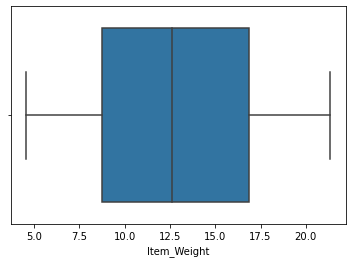

In [24]:
sns.boxplot(x = "Item_Weight", data = df_train)
plt.show()

lets impute ```Item_Weight``` with median.

 

In [25]:
df_train["Item_Weight"] = df_train["Item_Weight"].fillna(df_train["Item_Weight"].median())
df_test["Item_Weight"] = df_test["Item_Weight"].fillna(df_train["Item_Weight"].median())

In [26]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               353
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [28]:
df_train["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3            NaN
4            NaN
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

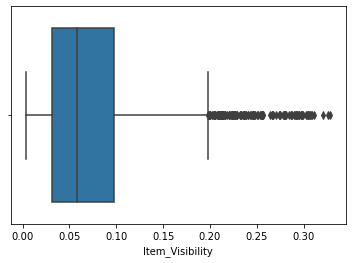

In [29]:
sns.boxplot(x = "Item_Visibility", data = df_train)
plt.show()

Lets impute `Item_Visibility` with median.

In [30]:
df_train["Item_Visibility"] = df_train["Item_Visibility"].fillna(df_train["Item_Visibility"].median())
df_test["Item_Visibility"] = df_test["Item_Visibility"].fillna(df_train["Item_Visibility"].median())

In [31]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [32]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [33]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Lets impute `Outlet_Size` with word **"Missing"**.

In [34]:
df_train["Outlet_Size"] = df_train["Outlet_Size"].fillna("Missing")
df_test["Outlet_Size"] = df_test["Outlet_Size"].fillna("Missing")

In [35]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [36]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [37]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Missing,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Missing,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Missing,Tier 2,Supermarket Type1
4,FDY38,12.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Data Formating Part-1:

In [39]:
list1 = []
for i in df_train["Item_Identifier"]:
    list1.append(i[0:2])
print(set(list1)) 
print(len(set(list1))) 

{'NC', 'FD', 'DR'}
3


In [40]:
df_train = df_train.replace({"[F][D][A-Z][0-9]+" : "FD", "[D][R][A-Z][0-9]+" : "DR", "[N][C][A-Z][0-9]+" : "NC"}, regex = True)
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [41]:
df_test = df_test.replace({"[F][D][A-Z][0-9]+" : "FD", "[D][R][A-Z][0-9]+" : "DR", "[N][C][A-Z][0-9]+" : "NC"}, regex = True)
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FD,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Missing,Tier 2,Supermarket Type1
2,NC,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Missing,Tier 3,Grocery Store
3,FD,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Missing,Tier 2,Supermarket Type1
4,FD,12.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [42]:
df_train = df_train.drop(columns = ["Item_Type"])
df_test = df_test.drop(columns = ["Item_Type"])

In [43]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.057792,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.057792,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.750,Low Fat,0.007565,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FD,8.300,Regular,0.038428,87.3198,OUT017,2007,Missing,Tier 2,Supermarket Type1
2,NC,14.600,Low Fat,0.099575,241.7538,OUT010,1998,Missing,Tier 3,Grocery Store
3,FD,7.315,Low Fat,0.015388,155.0340,OUT017,2007,Missing,Tier 2,Supermarket Type1
4,FD,12.600,Regular,0.118599,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [45]:
df_train.insert(6, "Outlet_Establishment_Age" ,2020 - df_train["Outlet_Establishment_Year"])
df_test.insert(6, "Outlet_Establishment_Age", 2020 - df_test["Outlet_Establishment_Year"])
df_train = df_train.drop(columns = ["Outlet_Establishment_Year"])
df_test = df_test.drop(columns = ["Outlet_Establishment_Year"])

In [46]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,249.8092,OUT049,21,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,48.2692,OUT018,11,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,141.6180,OUT049,21,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.057792,182.0950,OUT010,22,Missing,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.057792,53.8614,OUT013,33,High,Tier 3,Supermarket Type1,994.7052


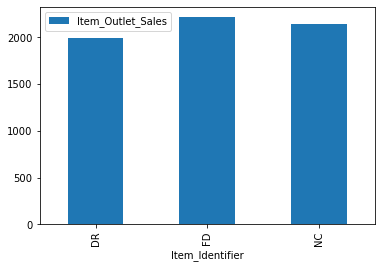

In [47]:
df_train.groupby("Item_Identifier").mean()[["Item_Outlet_Sales"]].plot(kind = "bar")
plt.show()

So food items have more average outlet sales than "DR" and "FD".

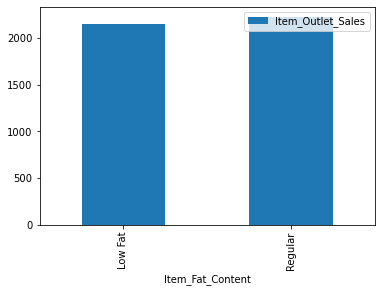

In [48]:
df_train.groupby("Item_Fat_Content").mean()[["Item_Outlet_Sales"]].plot(kind = "bar")
plt.show()

Low Fat and Regular have almost similar average Item_Outlet_Sales.

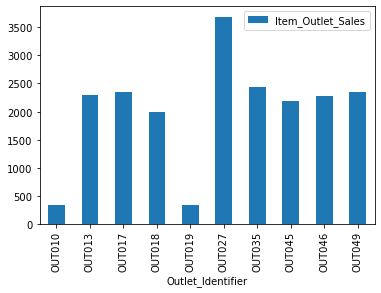

In [49]:
df_train.groupby("Outlet_Identifier").mean()[["Item_Outlet_Sales"]].plot(kind = "bar")
plt.show()

Outlet_Identifier "OUT027" has more average sales compared to others

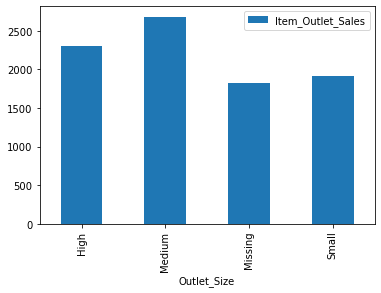

In [50]:
df_train.groupby("Outlet_Size").mean()[["Item_Outlet_Sales"]].plot(kind = "bar")
plt.show()

Outlet_Size "Medium" and "High" have more Average Sales Compared to others.

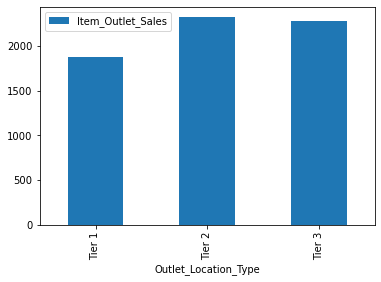

In [51]:
df_train.groupby("Outlet_Location_Type").mean()[["Item_Outlet_Sales"]].plot(kind = "bar")
plt.show()

Outlet_Location_Type "Tier 2" and "Tier 3" have more Average Sales Compare to Others

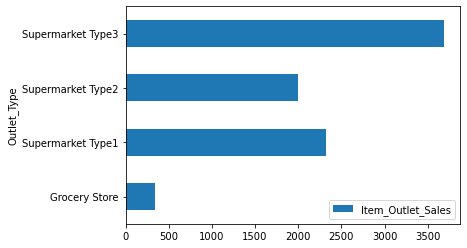

In [52]:
df_train.groupby("Outlet_Type").mean()[["Item_Outlet_Sales"]].plot(kind = "barh")
plt.show()

Supermarket Type3 three has more average sales compares to others types

In [53]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Age,Item_Outlet_Sales
Item_Weight,1.000000,-0.019065,0.024951,-0.007739,0.009693
Item_Visibility,-0.019065,1.000000,-0.004763,0.078328,-0.134161
Item_MRP,0.024951,-0.004763,1.000000,-0.005020,0.567574
Outlet_Establishment_Age,-0.007739,0.078328,-0.005020,1.000000,0.049135
Item_Outlet_Sales,0.009693,-0.134161,0.567574,0.049135,1.000000


Most Correlated Feature with Item_Outlet_Sales is Item_MRP

In [54]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.750,Low Fat,0.007565,107.8622,OUT049,21,Medium,Tier 1,Supermarket Type1
1,FD,8.300,Regular,0.038428,87.3198,OUT017,13,Missing,Tier 2,Supermarket Type1
2,NC,14.600,Low Fat,0.099575,241.7538,OUT010,22,Missing,Tier 3,Grocery Store
3,FD,7.315,Low Fat,0.015388,155.0340,OUT017,13,Missing,Tier 2,Supermarket Type1
4,FD,12.600,Regular,0.118599,234.2300,OUT027,35,Medium,Tier 3,Supermarket Type3


## Data Formating Part-2: One - Hot Encoding

In [55]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [56]:
X = pd.get_dummies(X, columns = ["Item_Identifier",
                                 "Item_Fat_Content",
                                 "Outlet_Identifier",
                                 "Outlet_Size",
                                 "Outlet_Location_Type",
                                 "Outlet_Type"], drop_first = True)

X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Age,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,21,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,11,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,17.50,0.016760,141.6180,21,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3,19.20,0.057792,182.0950,22,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.057792,53.8614,33,0,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [57]:
rf_features = RandomForestRegressor()
rf_features.fit(X,y)

RandomForestRegressor()

In [58]:
rf_features.feature_importances_

array([0.06661297, 0.12372273, 0.46113437, 0.03833848, 0.00790113,
       0.00642649, 0.01059199, 0.00203751, 0.00254577, 0.00987119,
       0.00682682, 0.04885405, 0.00371841, 0.00476622, 0.00408069,
       0.00298761, 0.01798134, 0.00418937, 0.00442709, 0.00237705,
       0.00215372, 0.09578157, 0.01488617, 0.05778727])

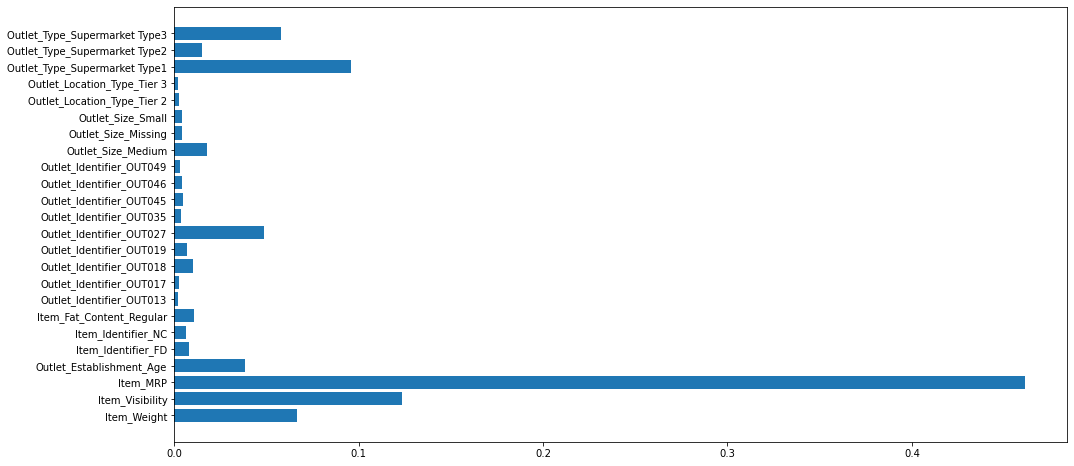

In [59]:
plt.figure(figsize = (16,8))
plt.barh(X.columns, rf_features.feature_importances_)
plt.show()

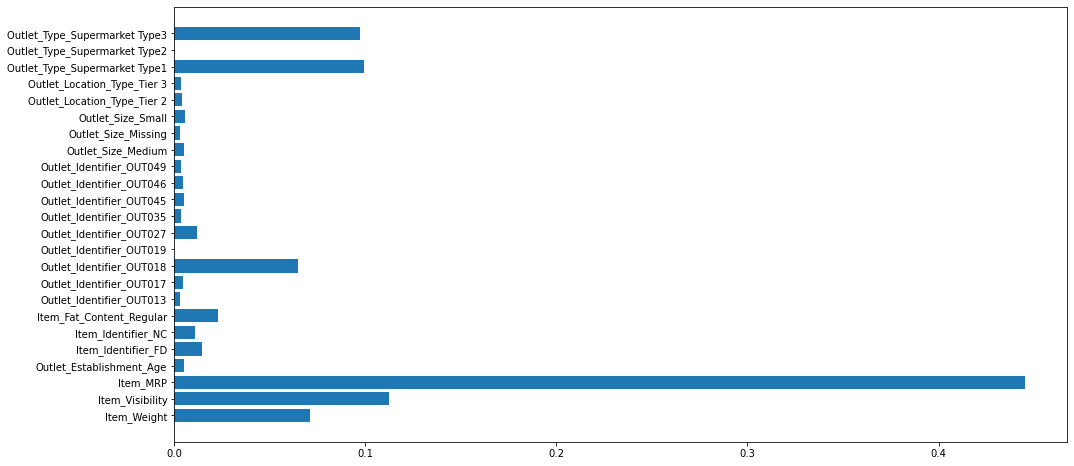

In [60]:
from sklearn.tree import ExtraTreeRegressor
etr = ExtraTreeRegressor()
etr.fit(X,y)
plt.figure(figsize = (16,8))
plt.barh(X.columns, etr.feature_importances_)
plt.show()

In [61]:
df_test = pd.get_dummies(df_test, columns = ["Item_Identifier",
                                             "Item_Fat_Content",
                                             "Outlet_Identifier",
                                             "Outlet_Size",
                                             "Outlet_Location_Type",
                                             "Outlet_Type"], drop_first = True)

df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Age,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,21,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,8.300,0.038428,87.3198,13,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,14.600,0.099575,241.7538,22,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,7.315,0.015388,155.0340,13,1,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,12.600,0.118599,234.2300,35,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1


## Build Priliminary Linear Regression Model:

In [62]:
errors = cross_val_score(estimator = LinearRegression(),
                         X = X,
                         y = y,
                         scoring = "neg_root_mean_squared_error",
                         cv = KFold(n_splits = 10),
                         verbose = 3)
np.mean(errors)

[CV]  ................................................................
[CV] ................................ , score=-1163.525, total=   0.0s
[CV]  ................................................................
[CV] ................................ , score=-1139.371, total=   0.0s
[CV]  ................................................................
[CV] ................................ , score=-1123.162, total=   0.0s
[CV]  ................................................................
[CV] ................................ , score=-1109.926, total=   0.0s
[CV]  ................................................................
[CV] ................................ , score=-1120.060, total=   0.0s
[CV]  ................................................................
[CV] ................................ , score=-1107.969, total=   0.0s
[CV]  ................................................................
[CV] ................................ , score=-1114.359, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


-1129.5775053503703

In [63]:
errors = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = 35),
                         X = X,
                         y = y,
                         scoring = "neg_mean_squared_error",
                         cv = KFold(n_splits = 10),
                         verbose = 3)
print("Mean neg_mean_absolute_error:", np.mean(errors))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ............................. , score=-1738259.359, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1888538.895, total=   0.0s
[CV]  ................................................................
[CV] ............................. , score=-1759796.411, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1689041.095, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1669454.138, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1715647.359, total=   0.1s
[CV]  ................................................................
[CV] ............................. , score=-1645605.118, total=   0.1s
[CV]  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [64]:
errors = cross_val_score(estimator = DecisionTreeRegressor(),
                         X = X,
                         y = y,
                         scoring = "neg_root_mean_squared_error",
                         cv = KFold(n_splits = 10),
                         verbose = 3)
print("Mean neg_mean_absolute_error:", np.mean(errors))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ................................ , score=-1511.955, total=   0.1s
[CV]  ................................................................
[CV] ................................ , score=-1561.965, total=   0.1s
[CV]  ................................................................
[CV] ................................ , score=-1608.218, total=   0.0s
[CV]  ................................................................
[CV] ................................ , score=-1500.452, total=   0.1s
[CV]  ................................................................
[CV] ................................ , score=-1625.271, total=   0.1s
[CV]  ................................................................
[CV] ................................ , score=-1520.744, total=   0.0s
[CV]  ................................................................
[CV] ................................ , score=-1551.933, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [67]:
errors = cross_val_score(estimator = RandomForestRegressor(n_estimators=100, max_depth = 5, min_samples_split = 2, min_samples_leaf=6, max_leaf_nodes = 26, max_samples = 0.5, ccp_alpha = 100),
                        X = X,
                        y = y,
                        scoring = "neg_root_mean_squared_error",
                        cv = KFold(n_splits = 10),
                        verbose = 0)
print("Mean neg_mean_absolute_error:", np.mean(errors))

Mean neg_mean_absolute_error: -1080.2199525312124


In [116]:
rfr_model = RandomForestRegressor(n_estimators=100, max_depth = 5, min_samples_split = 2, min_samples_leaf=6, max_leaf_nodes = 26, max_samples = 0.5, ccp_alpha = 100)

In [119]:
rfr_model.fit(X,y)

RandomForestRegressor(ccp_alpha=100, max_depth=5, max_leaf_nodes=26,
                      max_samples=0.5, min_samples_leaf=6)

In [120]:
pred2 = rfr_model.predict(df_test)

In [122]:
pd.DataFrame(data = pred2).to_csv("pred1.csv", index = False)

## Building Gradient Boosting Model

In [66]:
errors = cross_val_score(estimator = GradientBoostingRegressor(),
                         X = X,
                         y = y,
                         scoring = "neg_root_mean_squared_error",
                         cv = KFold(n_splits = 10),
                         verbose = 3)
print("Mean neg_mean_absolute_error:", np.mean(errors))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................ , score=-1116.713, total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ................................ , score=-1093.632, total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ................................ , score=-1103.416, total=   0.8s
[CV]  ................................................................
[CV] ................................ , score=-1066.620, total=   0.8s
[CV]  ................................................................
[CV] ................................ , score=-1093.057, total=   0.9s
[CV]  ................................................................
[CV] ................................ , score=-1070.858, total=   0.8s
[CV]  ................................................................
[CV] ................................ , score=-1062.512, total=   0.9s
[CV]  ................................................................
[CV] ................................ , score=-1089.880, total=   0.8s
[CV]  ................................................................
[CV] ................................ , score=-1068.141, total=   0.8s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    8.3s finished


We got RMSE of 1087.47 for base model of Gradient Boosting which is close to tuned Random Forest so lets tune the Gradient Boosing model

In [92]:
# Using GridSearchCV
# Round-1
# param_grid = {
#     "n_estimators" : [50,100,150],
#     "learning_rate" : [0.1,0.2,0.3],
# }
# model = GridSearchCV(estimator = GradientBoostingRegressor(),
#                     param_grid = param_grid,
#                     scoring = "neg_root_mean_squared_error",
#                     cv = 5,
#                     n_jobs = 1, 
#                     verbose = 3)
############################################################################################
# Round - 2
# param_grid = {
#     "subsample" : [0.8,0.9,1.0],
#     "min_samples_split" : [2,5,8,10],
# }
# model = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 50,
#                                                            learning_rate = 0.1),
#                     param_grid = param_grid,
#                     scoring = "neg_root_mean_squared_error",
#                     cv = 5,
#                     n_jobs = 1, 
#                     verbose = 3)
##########################################################################################
# Round - 3
# param_grid = {
#     "min_samples_leaf" : [1,3,5,7],
#     "max_depth" : [3,6,12,24]
# }
# model = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 50,
#                                                            learning_rate = 0.1,
#                                                            min_samples_split = 5,
#                                                            subsample = 0.8,),
#                     param_grid = param_grid,
#                     scoring = "neg_root_mean_squared_error",
#                     cv = 5,
#                     n_jobs = 1, 
#                     verbose = 3)
###########################################################################################
# Round - 4
# param_grid = {
#     "max_leaf_nodes" : [5,10,15,20,25,30],
#     "min_samples_leaf" : [7,8,9,10]
# }
# model = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 50,
#                                                            learning_rate = 0.1,
#                                                            min_samples_split = 5,
#                                                            subsample = 0.8,
#                                                            max_depth = 3),
#                     param_grid = param_grid,
#                     scoring = "neg_root_mean_squared_error",
#                     cv = 5,
#                     n_jobs = 1, 
#                     verbose = 3)
# Round - 5:
param_grid = {
    "min_samples_leaf" : [10, 13, 15]
}
model = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators = 50,
                                                           learning_rate = 0.1,
                                                           min_samples_split = 5,
                                                           subsample = 0.8,
                                                           max_depth = 3,
                                                           max_leaf_nodes = 20),
                    param_grid = param_grid,
                    scoring = "neg_root_mean_squared_error",
                    cv = 5,
                    n_jobs = 1, 
                    verbose = 3)
model.fit(X,y)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] min_samples_leaf=10 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. min_samples_leaf=10, score=-1108.055, total=   0.3s
[CV] min_samples_leaf=10 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............. min_samples_leaf=10, score=-1076.920, total=   0.3s
[CV] min_samples_leaf=10 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ............. min_samples_leaf=10, score=-1081.269, total=   0.4s
[CV] min_samples_leaf=10 .............................................
[CV] ............. min_samples_leaf=10, score=-1074.898, total=   0.4s
[CV] min_samples_leaf=10 .............................................
[CV] ............. min_samples_leaf=10, score=-1085.897, total=   0.3s
[CV] min_samples_leaf=13 .............................................
[CV] ............. min_samples_leaf=13, score=-1105.654, total=   0.4s
[CV] min_samples_leaf=13 .............................................
[CV] ............. min_samples_leaf=13, score=-1078.449, total=   0.3s
[CV] min_samples_leaf=13 .............................................
[CV] ............. min_samples_leaf=13, score=-1077.048, total=   0.4s
[CV] min_samples_leaf=13 .............................................
[CV] ............. min_samples_leaf=13, score=-1076.494, total=   0.4s
[CV] min_samples_leaf=13 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    5.2s finished


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_leaf_nodes=20,
                                                 min_samples_split=5,
                                                 n_estimators=50,
                                                 subsample=0.8),
             n_jobs=1, param_grid={'min_samples_leaf': [10, 13, 15]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [95]:
final_model = GradientBoostingRegressor(n_estimators = 50,
                                        learning_rate = 0.1,
                                        min_samples_split = 5,
                                        subsample = 0.8,
                                        max_depth = 3,
                                        max_leaf_nodes = 20,
                                        min_samples_leaf = 13)

In [97]:
final_model.fit(X,y)

GradientBoostingRegressor(max_leaf_nodes=20, min_samples_leaf=13,
                          min_samples_split=5, n_estimators=50, subsample=0.8)

In [98]:
preds3 = final_model.predict(df_test)

In [100]:
pd.DataFrame(data = preds3).to_csv("pred2.csv", index = False)